Handwritten Digit Recognition

Importing the libraries

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
import random

Data Preprocessing

In [2]:
from keras.datasets import mnist

# Loading Dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)

X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# Feature Scaling
X_train = X_train/255

X_test = X_test/255

# Encoding Categorical Data
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

encoder.fit(y_train)

y_train = encoder.transform(y_train).toarray()
y_test = encoder.transform(y_test).toarray()

Building the CNN

In [3]:
# Initializing CNN
cnn = tf.keras.models.Sequential()

# Adding first convolution layer
cnn.add(tf.keras.layers.Conv2D(filters=50, kernel_size=5, activation='relu', input_shape=[28, 28, 1]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding Second convolution layer
cnn.add(tf.keras.layers.Conv2D(filters=100, kernel_size=5, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding flattened layer of all features
cnn.add(tf.keras.layers.Flatten())

# Adding Fully connected layer
cnn.add(tf.keras.layers.Dense(units=256, activation='relu'))

# Adding output layer
cnn.add(tf.keras.layers.Dense(units=10, activation='softmax'))

Training the CNN

In [4]:
# Compiling the model 
cnn.compile(optimizer ='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Training the model
cnn.fit(X_train, y_train, batch_size = 64, epochs = 25, verbose=1,validation_data = (X_test, y_test))

Epoch 1/25
938/938 [==============================] - 6s 4ms/step - loss: 0.2755 - accuracy: 0.9151 - val_loss: 0.0404 - val_accuracy: 0.9862
Epoch 2/25
938/938 [==============================] - 4s 4ms/step - loss: 0.0396 - accuracy: 0.9877 - val_loss: 0.0263 - val_accuracy: 0.9920
Epoch 3/25
938/938 [==============================] - 4s 4ms/step - loss: 0.0235 - accuracy: 0.9927 - val_loss: 0.0239 - val_accuracy: 0.9924
Epoch 4/25
938/938 [==============================] - 4s 4ms/step - loss: 0.0168 - accuracy: 0.9947 - val_loss: 0.0247 - val_accuracy: 0.9926
Epoch 5/25
938/938 [==============================] - 4s 4ms/step - loss: 0.0141 - accuracy: 0.9954 - val_loss: 0.0304 - val_accuracy: 0.9909
Epoch 6/25
938/938 [==============================] - 4s 4ms/step - loss: 0.0102 - accuracy: 0.9967 - val_loss: 0.0286 - val_accuracy: 0.9919
Epoch 7/25
938/938 [==============================] - 4s 4ms/step - loss: 0.0075 - accuracy: 0.9975 - val_loss: 0.0258 - val_accuracy: 0.9927
Epoch 

Computing Confusion Matrix

In [5]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
y_pred = cnn.predict(X_test)
for i in range(y_pred.shape[0]):
  curr_max = 0
  category = -1
  for j in range(10):
    if y_pred[i][j] > curr_max:
      curr_max = y_pred[i][j]
      category = j
  for j in range(10):
    if j == category:
      y_pred[i][j] = 1
    else:
      y_pred[i][j] = 0

from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

print('Confusion matrix :\n',multilabel_confusion_matrix(y_test, y_pred))
print('Test accuracy :',accuracy_score(y_test, y_pred))

Confusion matrix :
 [[[9018    2]
  [   3  977]]

 [[8855   10]
  [   1 1134]]

 [[8964    4]
  [  10 1022]]

 [[8985    5]
  [   5 1005]]

 [[9012    6]
  [   6  976]]

 [[9096   12]
  [   5  887]]

 [[9039    3]
  [   8  950]]

 [[8962   10]
  [   8 1020]]

 [[9020    6]
  [   7  967]]

 [[8984    7]
  [  12  997]]]
Test accuracy : 0.9935


Visualizing random result from TestSet

In [7]:
def visualize_random_test():
  index = random.randrange(X_test.shape[0])
  print('image number :',index)
  imgplot = plt.imshow(X_test[index].reshape(28,28))
  print('Actual Result    : ',y_test[index])
  print('Predicted Result : ',y_pred[index])

image number : 3358
Actual Result    :  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Predicted Result :  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


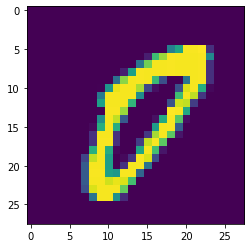

In [8]:
visualize_random_test()

image number : 9788
Actual Result    :  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Predicted Result :  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


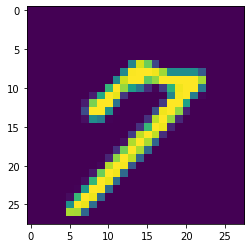

In [9]:
visualize_random_test()

image number : 7928
Actual Result    :  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Predicted Result :  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


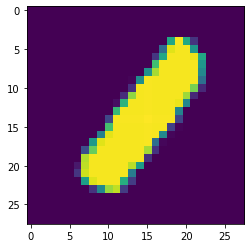

In [10]:
visualize_random_test()

Predictions from images other than Dataset

In [11]:
from keras.preprocessing import image
def visualize_other_test(test_image):
  test_image = image.img_to_array(test_image)
  test_image = test_image/256
  test_image = 1 - test_image
  result = cnn.predict(test_image.reshape(1,28,28,1))[0]

  curr_max = 0
  category = -1
  for j in range(10):
    if result[j] > curr_max:
      curr_max = result[j]
      category = j
  for j in range(10):
    if j == category:
      result[j] = 1
    else:
      result[j] = 0

  print('Prediction : ',result)
  imgplot = plt.imshow(test_image.reshape(28,28))

Prediction :  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


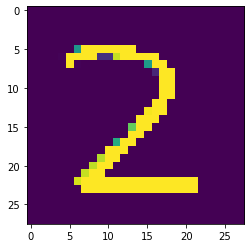

In [12]:
 test_image = image.load_img('/content/2.png', color_mode="grayscale", target_size = (28, 28))
 visualize_other_test(test_image)

Prediction :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


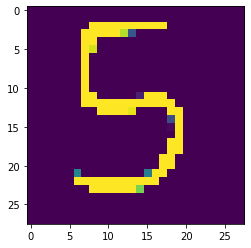

In [13]:
test_image = image.load_img('/content/5.png', color_mode="grayscale", target_size = (28, 28))
visualize_other_test(test_image)

Prediction :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


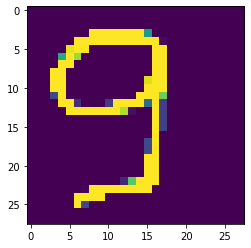

In [14]:
test_image = image.load_img('/content/9.png', color_mode="grayscale", target_size = (28, 28))
visualize_other_test(test_image)

Saving Model Data

In [15]:
cnn.save('Handwritten_Digit_Recognition.h5')
print("Saving the model as Handwritten_Digit_Recognition.h5")

Saving the model as Handwritten_Digit_Recognition.h5
